# **Sales Analysis**

### Import necessary libraries

In [1]:
import os
import pandas as pd

### Merge data from each month into one CSV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/Colab Notebooks/Python/Sales Analysis Data Science/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data"
files = [file for file in os.listdir(path)] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])

all_months_data.to_csv("all_data.csv", index=False)

### Read in updated dataframe

In [4]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   278797            Wired Headphones                1      11.99   
1   278798        USB-C Charging Cable                2      11.95   
2   278799    Apple Airpods Headphones                1      150.0   
3   278800            27in FHD Monitor                1     149.99   
4   278801  Bose SoundSport Headphones                1      99.99   

       Order Date                      Purchase Address  
0  11/21/19 09:54   46 Park St, New York City, NY 10001  
1  11/17/19 10:03      962 Hickory St, Austin, TX 73301  
2  11/19/19 14:56  464 Cherry St, Los Angeles, CA 90001  
3  11/25/19 22:24        649 10th St, Seattle, WA 98101  
4  11/09/19 13:56         522 Hill St, Boston, MA 02215

### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data


### Drop rows of NAN

In [5]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

Order ID Product Quantity Ordered Price Each Order Date Purchase Address
69       NaN     NaN              NaN        NaN        NaN              NaN
138      NaN     NaN              NaN        NaN        NaN              NaN
544      NaN     NaN              NaN        NaN        NaN              NaN
546      NaN     NaN              NaN        NaN        NaN              NaN
781      NaN     NaN              NaN        NaN        NaN              NaN

Order ID                     Product Quantity Ordered Price Each  \
0   278797            Wired Headphones                1      11.99   
1   278798        USB-C Charging Cable                2      11.95   
2   278799    Apple Airpods Headphones                1      150.0   
3   278800            27in FHD Monitor                1     149.99   
4   278801  Bose SoundSport Headphones                1      99.99   

       Order Date                      Purchase Address  
0  11/21/19 09:54   46 Park St, New York City, NY 10001  
1  11/17/19 10:03      962 Hickory St, Austin, TX 73301  
2  11/19/19 14:56  464 Cherry St, Los Angeles, CA 90001  
3  11/25/19 22:24        649 10th St, Seattle, WA 98101  
4  11/09/19 13:56         522 Hill St, Boston, MA 02215

### Get rid of text in order date column

In [6]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

### Make columns correct type

In [7]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

# Augment data with additional columns

### Add month column

In [8]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   278797            Wired Headphones                 1       11.99   
1   278798        USB-C Charging Cable                 2       11.95   
2   278799    Apple Airpods Headphones                 1      150.00   
3   278800            27in FHD Monitor                 1      149.99   
4   278801  Bose SoundSport Headphones                 1       99.99   

       Order Date                      Purchase Address  Month  
0  11/21/19 09:54   46 Park St, New York City, NY 10001     11  
1  11/17/19 10:03      962 Hickory St, Austin, TX 73301     11  
2  11/19/19 14:56  464 Cherry St, Los Angeles, CA 90001     11  
3  11/25/19 22:24        649 10th St, Seattle, WA 98101     11  
4  11/09/19 13:56         522 Hill St, Boston, MA 02215     11

### Add city column

In [9]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   278797            Wired Headphones                 1       11.99   
1   278798        USB-C Charging Cable                 2       11.95   
2   278799    Apple Airpods Headphones                 1      150.00   
3   278800            27in FHD Monitor                 1      149.99   
4   278801  Bose SoundSport Headphones                 1       99.99   

       Order Date                      Purchase Address  Month  \
0  11/21/19 09:54   46 Park St, New York City, NY 10001     11   
1  11/17/19 10:03      962 Hickory St, Austin, TX 73301     11   
2  11/19/19 14:56  464 Cherry St, Los Angeles, CA 90001     11   
3  11/25/19 22:24        649 10th St, Seattle, WA 98101     11   
4  11/09/19 13:56         522 Hill St, Boston, MA 02215     11   

                  City  
0  New York City  (NY)  
1         Austin  (TX)  
2    Los Angeles  (CA)  
3        Seattle  (WA)  
4         Boston  (MA)

# Data Exploration!

Question 1: What was the best month for sales? How much was earned that month?

In [10]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [11]:
all_data.groupby(['Month']).sum(numeric_only=True)

Quantity Ordered  Price Each       Sales
Month                                          
1                 10903  1811768.38  1822256.73
2                 13449  2188884.72  2202022.42
3                 17005  2791207.83  2807100.38
4                 20558  3367671.02  3390670.24
5                 18667  3135125.13  3152606.75
6                 15253  2562025.61  2577802.26
7                 16072  2632539.56  2647775.76
8                 13448  2230345.42  2244467.88
9                 13109  2084992.09  2097560.13
10                22703  3715554.83  3736726.88
11                19798  3180600.68  3199603.20
12                28114  4588415.41  4613443.34

range(1, 13)


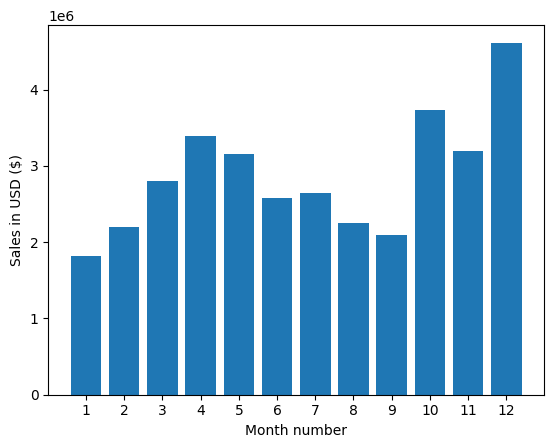

In [12]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum(numeric_only=True)['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()


### Question 2: What city sold the most product?

In [13]:
all_data.groupby(['City']).sum(numeric_only=True)

Quantity Ordered  Price Each   Month       Sales
City                                                                 
Atlanta  (GA)                   16602  2779908.20  104794  2795498.58
Austin  (TX)                    11153  1809873.61   69829  1819581.75
Boston  (MA)                    22528  3637409.77  141112  3661642.01
Dallas  (TX)                    16730  2752627.82  104620  2767975.40
Los Angeles  (CA)               33289  5421435.23  208325  5452570.80
New York City  (NY)             27932  4635370.83  175741  4664317.43
Portland  (ME)                   2750   447189.25   17144   449758.27
Portland  (OR)                  11303  1860558.22   70621  1870732.34
San Francisco  (CA)             50239  8211461.74  315520  8262203.91
Seattle  (WA)                   16553  2733296.01  104941  2747755.48

In [14]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum(numeric_only=True)['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

<ipython-input-14-b6342c016272>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [city for city, df in all_data.groupby(['City'])]


Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [15]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   278797            Wired Headphones                 1       11.99   
1   278798        USB-C Charging Cable                 2       11.95   
2   278799    Apple Airpods Headphones                 1      150.00   
3   278800            27in FHD Monitor                 1      149.99   
4   278801  Bose SoundSport Headphones                 1       99.99   

       Order Date                      Purchase Address  Month  \
0  11/21/19 09:54   46 Park St, New York City, NY 10001     11   
1  11/17/19 10:03      962 Hickory St, Austin, TX 73301     11   
2  11/19/19 14:56  464 Cherry St, Los Angeles, CA 90001     11   
3  11/25/19 22:24        649 10th St, Seattle, WA 98101     11   
4  11/09/19 13:56         522 Hill St, Boston, MA 02215     11   

                  City   Sales  Hour  Minute  Count  
0  New York City  (NY)   11.99     9      54      1  
1         Austin  (TX)   23.90    10       3      1  
2    Los Angeles  (CA)  150.00    14      56      1  
3        Seattle  (WA)  149.99    22      24      1  
4         Boston  (MA)   99.99    13      56      1

In [ ]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

Question 4: What products are most often sold together?

In [16]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df2 = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

<ipython-input-16-702d0d95e0a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


Order ID                     Product  Quantity Ordered  Price Each  \
9    278806  Bose SoundSport Headphones                 1       99.99   
10   278806             ThinkPad Laptop                 1      999.99   
15   278811            Wired Headphones                 1       11.99   
16   278811    Apple Airpods Headphones                 1      150.00   
24   278819                      iPhone                 1      700.00   

        Order Date                       Purchase Address  Month  \
9   11/19/19 19:12           174 2nd St, Boston, MA 02215     11   
10  11/19/19 19:12           174 2nd St, Boston, MA 02215     11   
15  11/06/19 16:01     99 Elm St, San Francisco, CA 94016     11   
16  11/06/19 16:01     99 Elm St, San Francisco, CA 94016     11   
24  11/04/19 06:20  880 Maple St, New York City, NY 10001     11   

                   City   Sales  Hour  Minute  Count  \
9          Boston  (MA)   99.99    19      12      1   
10         Boston  (MA)  999.99    19      12      1   
15  San Francisco  (CA)   11.99    16       1      1   
16  San Francisco  (CA)  150.00    16       1      1   
24  New York City  (NY)  700.00     6      20      1   

                                       Grouped  
9   Bose SoundSport Headphones,ThinkPad Laptop  
10  Bose SoundSport Headphones,ThinkPad Laptop  
15   Wired Headphones,Apple Airpods Headphones  
16   Wired Headphones,Apple Airpods Headphones  
24             iPhone,Apple Airpods Headphones

In [17]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What product sold the most? Why do you think it sold the most?

In [ ]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

<ipython-input-79-453e22375345>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
<ipython-input-79-453e22375345>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)


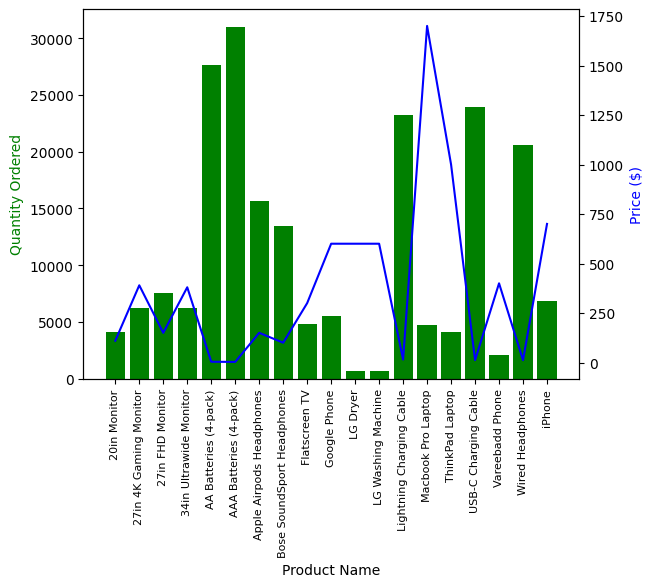

In [ ]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()